In [1]:
import pandas as pd
from sequenzo import * 

In [2]:
detailed_df = pd.read_csv('/Users/lei/Library/CloudStorage/OneDrive-Nexus365/sequenzo/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv')
    
detailed_df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software


In [8]:
# Cleaned the columns that contain time

# Sample DataFrame with column names
detailed_df.columns  # ['worker_id', 'C1', 'C2', ..., 'C10']

# Rename 'C1' to '1', 'C2' to '2', ..., but keep 'worker_id' as-is
detailed_df = detailed_df.rename(columns={col: col[1:] for col in detailed_df.columns if col.startswith("C")})

# Result:
# ['worker_id', '1', '2', '3', ..., '10']

detailed_df

,worker_id,1,2,3,4,5,6,7,8,9,10
0,dilip-kumar-nath-7538746a,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,software,software,software,software,software,support & test,software,software,software,software


In [10]:
detailed_df = detailed_df[['worker_id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]
detailed_df_time = list(detailed_df.columns)[1:]
detailed_states = ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']
    
detailed_data = SequenceData(detailed_df, time=detailed_df_time, time_type="age", id_col="worker_id", states=detailed_states)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 38902
[>] Min/Max sequence length: 10 / 10
[>] Alphabet: ['data', 'data & intensive math', 'hardware', 'research', 'software', 'software & hardware', 'support & test']


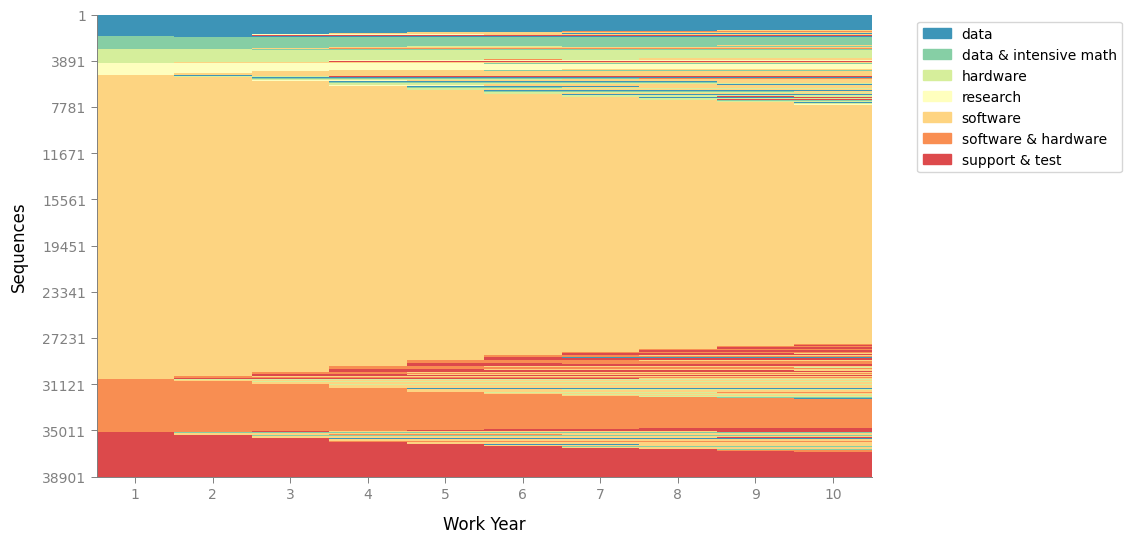

In [12]:
plot_sequence_index(detailed_data, save_as='detailed_data_index_plot', xlabel='Work Year')

## Dissimilarity measures

In [13]:
# 很快，OMspell sm=TRATE 51秒做完, 没必要做 trate，因为转换的人太少了，所以还不如直接 sm
# 不用 sm=TRATE 的话 41s 能跑完

detailed_distance_matrix = get_distance_matrix(seqdata=detailed_data, 
                                               method="OMspell", 
                                               sm="CONSTANT", 
                                               indel=1, 
                                               expcost=1)

detailed_distance_matrix

# Why does it only show an 11*11 matrix as an output?

[!] cpu_affinity() not supported on this platform. Skipping...
========= get_distance_matrix =======
<module 'sequenzo.dissimilarity_measures.c_code' from '/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/dissimilarity_measures/c_code.cpython-311-darwin.so'>
['DHDdistance', 'OMdistance', 'OMspellDistance', 'PAMonce', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'dist2matrix', 'weightedinertia']
[>] Processing 38902 sequences with 7 unique states.
  - Creating 8x8 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


[>] Identified 2365 unique spell sequences.
[>] Sequence spell length: min/max = 1 / 6.

[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,dilip-kumar-nath-7538746a,vinodkumar-yadav-b7a976107,josh-slosson-07a1509,jonatthan-rodriguez-8a5612121,jeenesh-jyothindran-8ba28818,sudheer-kumar-75834285,vinod-chavan-6ab338ab,satish-b-0a25b929,krishal-krishna-shetty-475397101,gurinder-singh-716792b8,...,layamrudhaa-venkatesan-51036b29,sowmiya-srinivasan-503511137,yelena-wu-a2a2332a,jakhani,michelle-elder,nan-jiang-743a9863,tina-pava-4846207,sariandoni,nancy-jain-a8723460,christy-garner-677894213
dilip-kumar-nath-7538746a,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,20.0,...,4.0,0.0,4.0,0.0,8.0,0.0,0.0,8.0,10.0,20.0
vinodkumar-yadav-b7a976107,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,20.0,...,4.0,0.0,4.0,0.0,8.0,0.0,0.0,8.0,10.0,20.0
josh-slosson-07a1509,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,20.0,...,4.0,0.0,4.0,0.0,8.0,0.0,0.0,8.0,10.0,20.0
jonatthan-rodriguez-8a5612121,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,20.0,...,4.0,0.0,4.0,0.0,8.0,0.0,0.0,8.0,10.0,20.0
jeenesh-jyothindran-8ba28818,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,20.0,...,4.0,0.0,4.0,0.0,8.0,0.0,0.0,8.0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan-jiang-743a9863,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,20.0,...,4.0,0.0,4.0,0.0,8.0,0.0,0.0,8.0,10.0,20.0
tina-pava-4846207,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,20.0,...,4.0,0.0,4.0,0.0,8.0,0.0,0.0,8.0,10.0,20.0
sariandoni,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,18.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,10.0,18.0
nancy-jain-a8723460,10.0,10.0,10.0,10.0,10.0,10.0,8.0,8.0,10.0,18.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,18.0


In [15]:
# Hierarchical clustering

import sys

# 设置更高的递归深度，比如 20000
sys.setrecursionlimit(20000)

detailed_cluster = Cluster(detailed_distance_matrix, detailed_df.worker_id, clustering_method='ward')

detailed_cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")


[>] Converting DataFrame to NumPy array...


RecursionError: maximum recursion depth exceeded

<Figure size 1200x800 with 0 Axes>

## Broad df

In [ ]:
sequence_output_file_path = '/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/output/occupational_segregation_paper/sequence_analysis'

broad_df = pd.read_csv(f'{sequence_output_file_path}/sequence_visualization/broad_sequence_df_5_years_or_more.csv')

broad_df

In [ ]:
# Cleaned the columns that contain time

# Sample DataFrame with column names
broad_df.columns  # ['worker_id', 'C1', 'C2', ..., 'C10']

# Rename 'C1' to '1', 'C2' to '2', ..., but keep 'worker_id' as-is
broad_df = broad_df.rename(columns={col: col[1:] for col in broad_df.columns if col.startswith("C")})

# Result:
# ['worker_id', '1', '2', '3', ..., '10']

broad_df

In [16]:
broad_df = broad_df[['worker_id', '1', '2', '3', '4', '5']]
broad_time = list(broad_df.columns)[4:]
broad_states = ['Non-computing', 'Non-technical computing', 'Technical computing']
    
# get distance matrix
broad_data = SequenceData(broad_df, 
                          time=broad_time, 
                          time_type="age", 
                          id_col="worker_id", 
                          states=broad_states)

broad_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 373759
[>] Min/Max sequence length: 2 / 2
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


SequenceData(373759 sequences, Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing'])

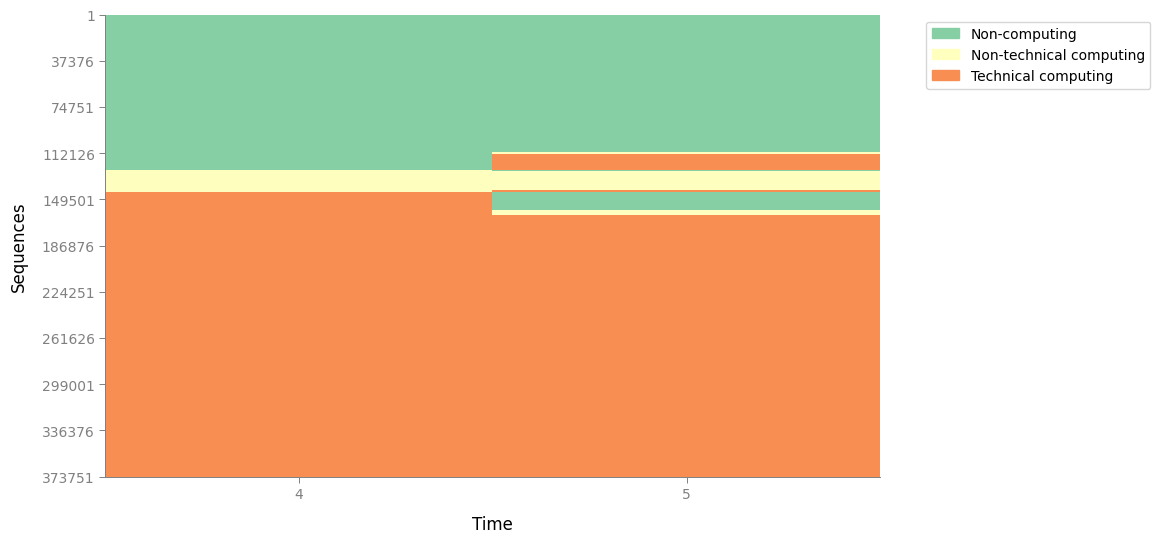

In [17]:
plot_sequence_index(broad_data, save_as='broad_data_index_plot')

## 10 years

In [18]:
sequence_output_file_path = '/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/output/occupational_segregation_paper/sequence_analysis'

broad_10_df = pd.read_csv(f'{sequence_output_file_path}/sequence_visualization/broad_sequence_df_10_years_or_more.csv')

broad_10_df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
1,munish-bansal-4a984771,male,india,11-20 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
2,aashish-jain-06449730,male,india,11-20 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
3,sumit-kumar-ab581a15b,male,india,0-10 total work years,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing,Non-computing
4,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166420,tutku-govsa,female,us,21+ total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Non-technical computing,Non-technical computing,Non-technical computing
166421,saidivya-kakuturu-782a335b,female,us,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Non-technical computing,Non-technical computing
166422,greeshma-malgireddy-86aa78a,female,us,11-20 total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing
166423,christy-garner-677894213,female,us,21+ total work years,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing,Technical computing


In [19]:
broad_10_df = broad_10_df[['worker_id', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']]
broad_10_years_time = list(broad_10_df.columns)[4:]
broad_states = ['Non-computing', 'Non-technical computing', 'Technical computing']
    
# get distance matrix
broad_10_data = SequenceData(broad_10_df, 
                             time=broad_10_years_time, 
                             time_type="age", 
                             id_col="worker_id", 
                             states=broad_states)

broad_10_data


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 166425
[>] Min/Max sequence length: 7 / 7
[>] Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing']


SequenceData(166425 sequences, Alphabet: ['Non-computing', 'Non-technical computing', 'Technical computing'])

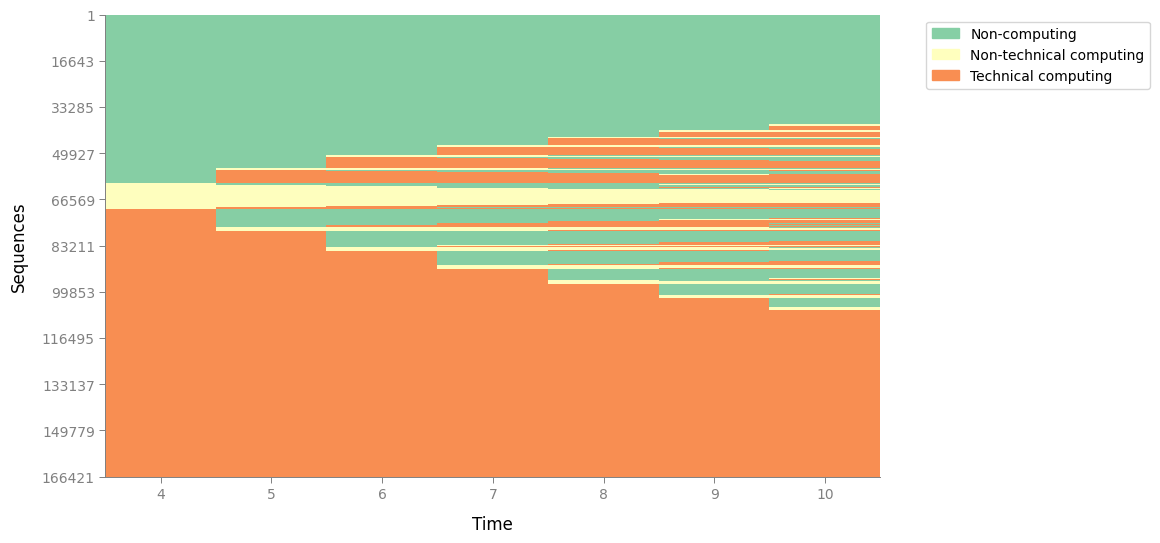

In [20]:
plot_sequence_index(broad_10_data, save_as='broad_data_10_years_index_plot')